In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import FileLink
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gc

# Only 2018 case data

### Getting the data ready, cleaning and processing

(6757967, 5)


<AxesSubplot:xlabel='duration', ylabel='Density'>

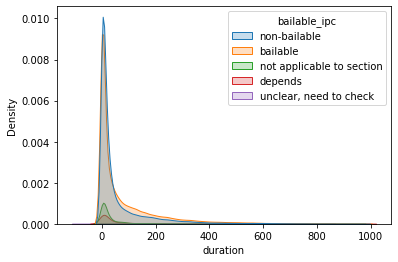

In [2]:
data=pd.read_csv('/kaggle/input/cleanedcriminalcasedata2018-proc/cleanedCriminalCaseData2018.csv',index_col='ddl_case_id',dtype={'ddl_case_id':'str','date_of_filing':'str','date_of_decision':'str'})
print(data.shape)

# we need this graph to calculate the outlier cutoff
sns.kdeplot(data=data,x=data['duration'],hue='bailable_ipc',shade=True)

### tuning the data to calculate average duration of a bailable case

In [3]:
data=data.drop('criminal',axis=1).dropna(subset=['bailable_ipc'])

### finding the mean with and without outliers

In [4]:
# finding the mean for bailable cases
bailableData=data[data['bailable_ipc']=='bailable']
nonBailableData=data[data['bailable_ipc']=='non-bailable']

bailableMean=bailableData['duration'].mean()
nonBailableMean=nonBailableData['duration'].mean()
print('A bailable case on an average lasts',bailableMean,'days')
print('A non-bailable case on an average lasts',nonBailableMean,'days')

A bailable case on an average lasts 81.63829035133557 days
A non-bailable case on an average lasts 61.544638684527925 days


After trimming the new mean for bailable cases is 54.81478423398443 days
After trimming the new mean for non-bailable cases is 28.701631749254688 days


<AxesSubplot:xlabel='duration', ylabel='Density'>

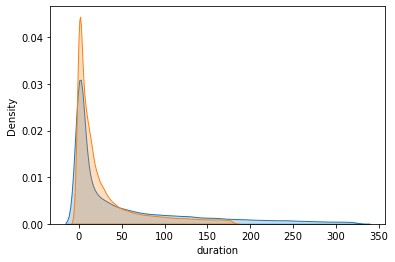

In [5]:
# trimming more(the higher) outliers, to get a mean that has a higher probability of occuring
iqrBailable=(bailableData['duration'].quantile(0.75)-bailableData['duration'].quantile(0.25))
trimmedBailableData=bailableData[bailableData['duration']<(bailableData['duration'].quantile(0.75) + 2*iqrBailable)]

iqrNonBailable=(nonBailableData['duration'].quantile(0.75)-nonBailableData['duration'].quantile(0.25))
trimmedNonBailableData=nonBailableData[nonBailableData['duration']<(nonBailableData['duration'].quantile(0.75) + 2*iqrNonBailable)]

print('After trimming the new mean for bailable cases is',trimmedBailableData['duration'].mean(),'days')
print('After trimming the new mean for non-bailable cases is',trimmedNonBailableData['duration'].mean(),'days')

sns.kdeplot(trimmedBailableData['duration'],shade=True)
sns.kdeplot(trimmedNonBailableData['duration'],shade=True)

# Mean time over all years

In [2]:
all_averages_list=[]
for i in range(0,9):
    data=pd.read_csv('/kaggle/input/cleanedcriminalcasedata/cleanedCriminalCaseData/cleanedCriminalCaseData201%d.csv'%i,index_col='ddl_case_id',dtype={'ddl_case_id':'str','date_of_filing':'str','date_of_decision':'str'})
    data=data.drop('criminal',axis=1).dropna(subset=['bailable_ipc'])
    bailableData=data[data['bailable_ipc']=='bailable']
    nonBailableData=data[data['bailable_ipc']=='non-bailable']

    
    all_averages_list.append(['201%d'%i,'no',nonBailableData['duration'].mean(),nonBailableData['duration'].sum(),nonBailableData['duration'].count()])
    all_averages_list.append(['201%d'%i,'yes',bailableData['duration'].mean(),bailableData['duration'].sum(),bailableData['duration'].count()])
    
    del data
    gc.collect()
    print('processed 201%d'%i)
    

processed 2010
processed 2011
processed 2012
processed 2013
processed 2014
processed 2015
processed 2016
processed 2017
processed 2018


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


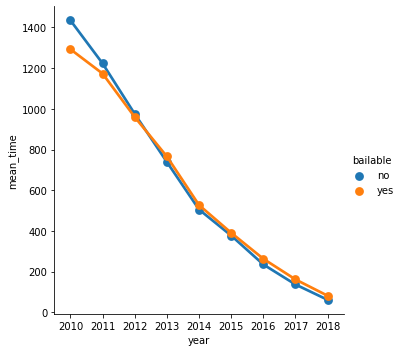

In [4]:
all_averages=pd.DataFrame(data=all_averages_list,columns=['year','bailable','mean_time','total_duration','total_cases'])
all_averages=all_averages.astype(dtype={'year':'str','bailable':'str','mean_time':'float','total_duration':'int','total_cases':'int'})
sns.factorplot(data=all_averages,x='year',y='mean_time',hue='bailable')

In [5]:
bTotal_duration=all_averages.groupby('bailable')['total_duration'].sum()
bTotal_cases=all_averages.groupby('bailable')['total_cases'].sum()
bAverage=bTotal_duration/bTotal_cases
print('Average duration of a case')
bAverage

Average duration of a case


bailable
no     387.303367
yes    438.406147
dtype: float64

In [6]:
recent_averages=all_averages[(all_averages['year']=='2016') | (all_averages['year']=='2017') | (all_averages['year']=='2018')]
bRecent_average=recent_averages.groupby('bailable')['total_duration'].sum()/recent_averages.groupby('bailable')['total_cases'].sum()
print('Average duration of a case over the last 3 years')
bRecent_average

Average duration of a case over the last 3 years


bailable
no     137.557264
yes    169.460892
dtype: float64